In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [4]:
data_train = pd.read_csv('../input/fashionmnist/fashion-mnist_train.csv')
data_test = pd.read_csv('../input/fashionmnist/fashion-mnist_test.csv')

In [5]:
data_train.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [6]:
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

In [7]:
x_train = np.array(data_train.drop(["label"],axis=1))
y_train = np.array(data_train["label"])

In [8]:
x_test = np.array(data_test.drop(["label"],axis=1))
y_test = np.array(data_test["label"])

In [9]:
x_train.shape

(60000, 784)

In [10]:
x_test.shape

(10000, 784)

In [11]:
data_train["label"].value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: label, dtype: int64

In [12]:
x_train = x_train.reshape(60000,28, 28, 1)
x_train = x_train / 255.0
x_test = x_test.reshape(10000, 28, 28, 1)
x_test = x_test/255.0

In [19]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),  
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [20]:
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [21]:
history = model.fit(x_train, 
                    y_train,
                   epochs = 50)


Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4741 - accuracy: 0.8285
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3230 - accuracy: 0.8822
Epoch 3/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2765 - accuracy: 0.8979
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2454 - accuracy: 0.9101
Epoch 5/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2221 - accuracy: 0.9179
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2031 - accuracy: 0.9255
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1847 - accuracy: 0.9316
Epoch 8/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1712 - accuracy: 0.9361
Epoch 9/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1585 - accuracy: 0.9413
Epoch 10/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.144

In [22]:
model.evaluate(x_test, y_test, verbose=0)

[0.7500757575035095, 0.9071999788284302]

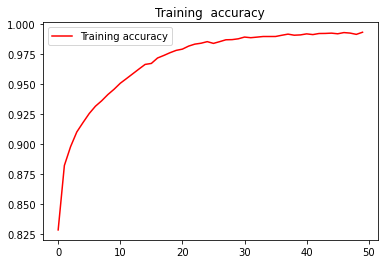

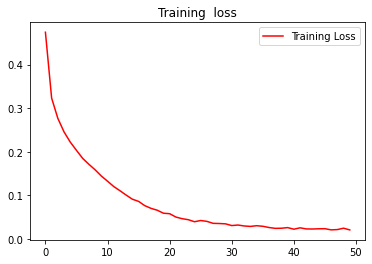

In [23]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss =  history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.title('Training  accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.title('Training  loss')
plt.legend()

plt.show()

In [24]:
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model1.compile(optimizer = 'rmsprop', 
              loss = 'sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history = model1.fit(x_train, 
                    y_train,
                   epochs = 15)

Epoch 1/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4692 - accuracy: 0.8286
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3146 - accuracy: 0.8856
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2739 - accuracy: 0.9005
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2502 - accuracy: 0.9099
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2336 - accuracy: 0.9154
Epoch 6/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2222 - accuracy: 0.9189
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2126 - accuracy: 0.9238
Epoch 8/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2065 - accuracy: 0.9257
Epoch 9/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2001 - accuracy: 0.9280
Epoch 10/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.197

In [25]:
model1.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.2809 - accuracy: 0.9076


[0.2808591425418854, 0.9075999855995178]

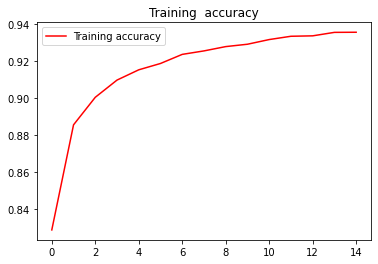

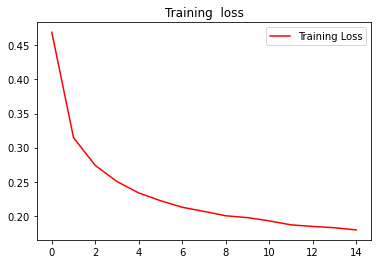

In [26]:
acc = history.history['accuracy']
loss =  history.history['loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.title('Training  accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.title('Training  loss')
plt.legend()
plt.show()

In [27]:
from keras.layers import Conv2D, Input, LeakyReLU, Dense, Activation, Flatten, Dropout, MaxPool2D
from keras import models
model = models.Sequential()
model.add(Conv2D(32,3, padding  ="same",input_shape=(28,28,1)))
model.add(LeakyReLU())
model.add(Conv2D(32,3, padding  ="same"))
model.add(LeakyReLU())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Block 2
model.add(Conv2D(64,3, padding  ="same"))
model.add(LeakyReLU())
model.add(Conv2D(64,3, padding  ="same"))
model.add(LeakyReLU())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation="sigmoid"))


model.compile(optimizer = 'rmsprop', 
              loss = 'sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history = model.fit(x_train, 
                    y_train, batch_size=256,
                   epochs = 25)

Epoch 1/25
235/235 [==============================] - 3s 13ms/step - loss: 0.7386 - accuracy: 0.6879
Epoch 2/25
235/235 [==============================] - 3s 13ms/step - loss: 0.3502 - accuracy: 0.8726
Epoch 3/25
235/235 [==============================] - 3s 12ms/step - loss: 0.2838 - accuracy: 0.8967
Epoch 4/25
235/235 [==============================] - 3s 12ms/step - loss: 0.2462 - accuracy: 0.9089
Epoch 5/25
235/235 [==============================] - 3s 13ms/step - loss: 0.2192 - accuracy: 0.9190
Epoch 6/25
235/235 [==============================] - 3s 12ms/step - loss: 0.1985 - accuracy: 0.9257
Epoch 7/25
235/235 [==============================] - 3s 12ms/step - loss: 0.1771 - accuracy: 0.9331
Epoch 8/25
235/235 [==============================] - 3s 12ms/step - loss: 0.1624 - accuracy: 0.9382
Epoch 9/25
235/235 [==============================] - 3s 13ms/step - loss: 0.1478 - accuracy: 0.9446
Epoch 10/25
235/235 [==============================] - 3s 12ms/step - loss: 0.1381 - accura

In [28]:
model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 1s 3ms/step - loss: 0.3200 - accuracy: 0.9282


[0.31996142864227295, 0.9282000064849854]

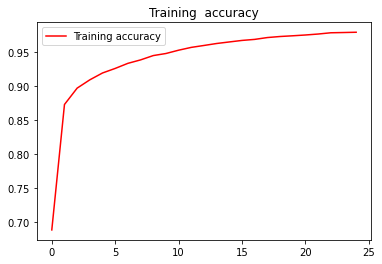

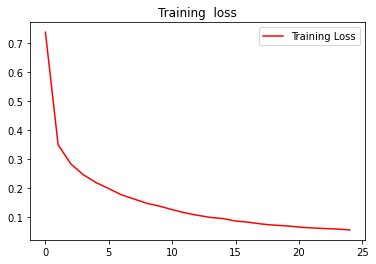

In [29]:
acc = history.history['accuracy']
loss =  history.history['loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.title('Training  accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.title('Training  loss')
plt.legend()
plt.show()